In [1]:
# import core packages
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations
import os

# import semi-core packages
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.style.use('seaborn-v0_8-poster')
import numpy as np
import pandas as pd
from multiprocessing import Pool
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# import open2c libraries
import bioframe

import cooler
import cooltools
import cooltools.lib.plotting
import cooltools.lib.numutils

from packaging import version
if version.parse(cooltools.__version__) < version.parse('0.5.2'):
    raise AssertionError("tutorial relies on cooltools version 0.5.2 or higher,"+
                         "please check your cooltools version and update to the latest")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Coarse Graining Tool

In [2]:
# coarse grains an input square matrix
def coarse_grainer(input_matrix, res):
    # res is the number of old bins per new bin
    N_input = input_matrix.shape[0]
    N_coarse = int(N_input/res)
    print('N_coarse =',N_coarse)
    output_matrix = np.zeros((N_coarse,N_coarse))
    for i in range(N_coarse):
        for j in range(N_coarse):
            output_matrix[i,j] = np.average(input_matrix[i*res:(i+1)*res,j*res:(j+1)*res])
    return output_matrix

# Zoomed out Hi-C

In [3]:
# Load a Hi-C map from a cooler file.
clr_50kb = cooler.Cooler(f'/Users/douglas/Documents/Features_Transfer/store_Hi-C/JJ10_11_17_18.wo3kbCisTransHom.50000.cool')

N_coarse = 176


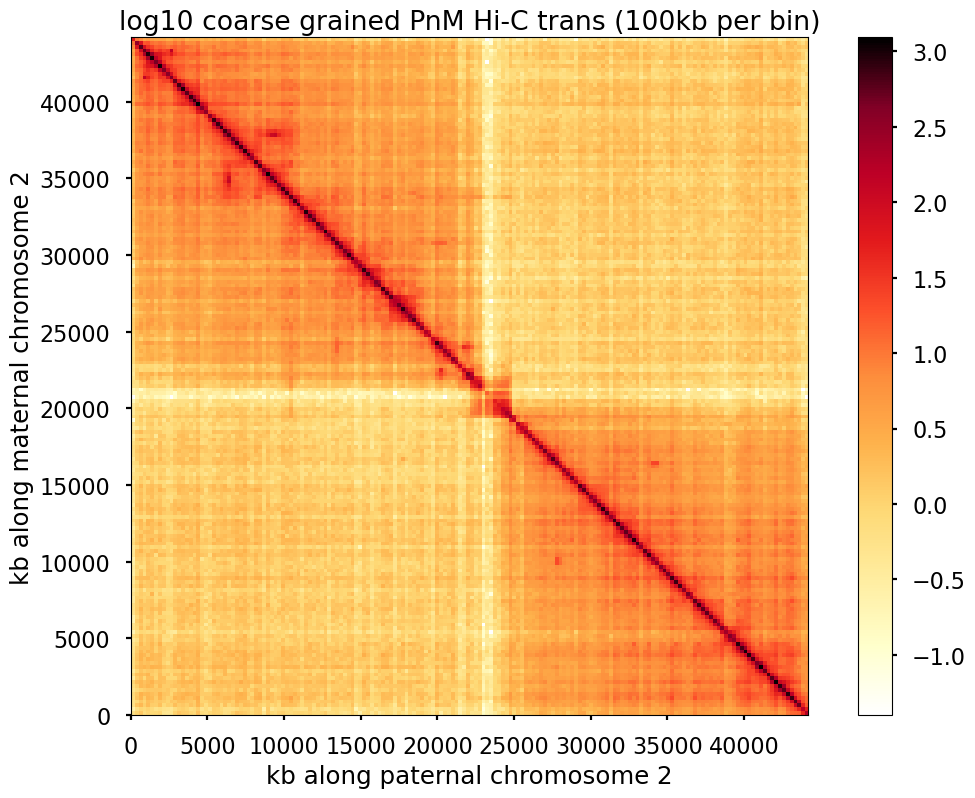

In [4]:
res_coarse_50kb = 2 # number of old 1kb bins per new bin

matrix = clr_50kb.matrix(balance=False)[0:884,884:1768] # most of maternal chromosome 2
matrix = np.nan_to_num(matrix) # make the nan entries 0
matrix = coarse_grainer(matrix, 5) # coarse grain

plt.title(f'log10 coarse grained PnM Hi-C trans ({res_coarse_50kb*50}kb per bin)')
plt.imshow(np.log10(matrix),cmap='fall', 
           extent=[0, 50*884, 0, 50*884])
plt.xlabel('kb along paternal chromosome 2')
plt.ylabel('kb along maternal chromosome 2')
plt.colorbar()
#plt.savefig('/Users/douglas/Documents/Features_Transfer/figures/chr2_trans.pdf')
plt.show()

# Zoomed in Hi-C

N_coarse = 19


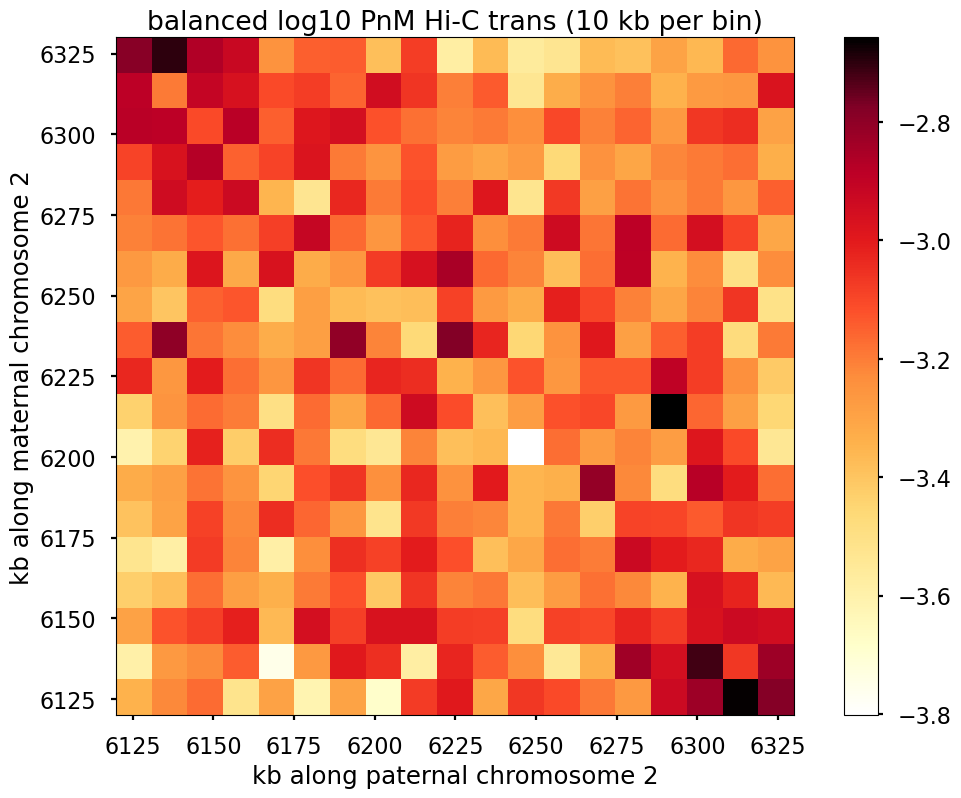

In [11]:
# Load a Hi-C map from a cooler file.
clr_1kb = cooler.Cooler('/Users/douglas/Documents/Features_Transfer/store_Hi-C/JJ10_11_17_18.wo3kbCisTransHom.1000.cool')

res_coarse_1kb = 10 # number of old 1kb bins per new bin
start_index = 6120 # 5900 for loose; 6400 for tight (kb)
stop_index = 6330 # start_index + 600 (kb)

trans_matrix = clr_1kb.matrix(balance=True)[start_index:stop_index, start_index + 44159: stop_index + 44159]
trans_matrix = trans_matrix[:,~np.isnan(trans_matrix).all(axis=0)]# Remove columns of all NaN
trans_matrix = trans_matrix[~np.isnan(trans_matrix).all(axis=1), :]# Remove rows of all NaN
trans_matrix = np.nan_to_num(trans_matrix) # make the nan entries 0
trans_matrix = coarse_grainer(trans_matrix, res_coarse_1kb) # coarse grain

plt.title(f'balanced log10 PnM Hi-C trans ({res_coarse_1kb} kb per bin)')
plt.imshow(np.log10(trans_matrix),cmap='fall', 
           extent=[start_index, stop_index, start_index, stop_index])
plt.xlabel('kb along paternal chromosome 2')
plt.ylabel('kb along maternal chromosome 2')
plt.colorbar()
#plt.savefig('/Users/douglas/Documents/Features_Transfer/figures/chr2_trans_loose.pdf')
plt.show()